In [41]:
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format', '{:.10f}'.format)

pd.options.display.max_seq_items = 2000

# import python modules
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('/Users/tabea/Documents/UrbanMobility/src')
from models import random_forest_model as model
from models import gradient_boosting_model as model_gb

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Gradient Boosting

### Data Preparation

In [2]:
journey_16 = pd.read_csv('../data/processed/agg_journey_data_2016.csv', parse_dates=['end_date', 'start_date'], index_col=0)
journey_17 = pd.read_csv('../data/processed/agg_journey_data_2017.csv', parse_dates=['end_date', 'start_date'], index_col=0)
journey_18 = pd.read_csv('../data/processed/agg_journey_data_2018.csv', parse_dates=['end_date', 'start_date'], index_col=0)
journey_19 = pd.read_csv('../data/processed/agg_journey_data_2019.csv', parse_dates=['end_date', 'start_date'], index_col=0)

In [3]:
journey_train = pd.concat([journey_16, journey_17, journey_18])
journey_test = journey_19.copy()

In [4]:
x_train, y_train, x_test, y_test = model.train_test_split(journey_train, journey_test)

### Model 1: Gradient Boosting

In [43]:
# hyperparameter tuning
random_search = model_gb.hyper_param_tuning_gb(x_train, y_train, 10, 3)


# print or log all tried parameters and their scores
params = pd.DataFrame(random_search.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
print(params.head(10))


# predict on the test set using the best model
gb = random_search.best_estimator_
y_pred = gb.predict(x_test)

KeyboardInterrupt: 

In [26]:
# evaluation metrics
rmse, mae, r2 = model.evaluation_metrics(y_test, y_pred)

print('RMSE:', rmse)
print('MAE:', mae)
print('R2 Score:', r2)

RMSE: 56.89204515410588
MAE: 30.193826285685997
R2 Score: 0.831864826553777


In [42]:
# feature importance
print(model.get_feature_importance(gb, x_train).to_string())

                                       Feature   Importance
1                                         hour 0.4443854944
22                           bike_docks_counts 0.0735296058
3                                  part_of_day 0.0726148501
105                  start_borough_Westminster 0.0709170137
19                                day_of_month 0.0501224796
33              ethnic_african_caribbean_ratio 0.0346512758
76               residence_lengh_uk_born_ratio 0.0335658293
39                     religion_buddhist_ratio 0.0303671109
7                                      tempmax 0.0256178472
2                                   is_weekend 0.0187611683
0                                  day_of_week 0.0180041200
21                         bike_station_counts 0.0115820793
36                     ethnic_arab_other_ratio 0.0093608710
34                          ethnic_mixed_ratio 0.0084783576
50                              health_1_ratio 0.0081333669
12                                      

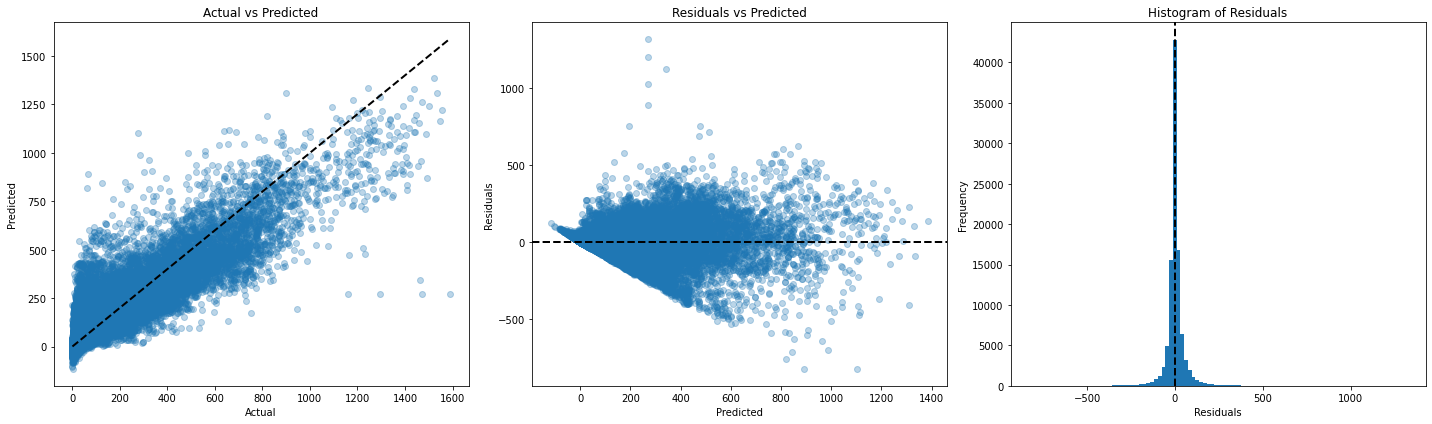

In [32]:
# evaluation visualisation
model.evaluation_vis(y_test, y_pred)

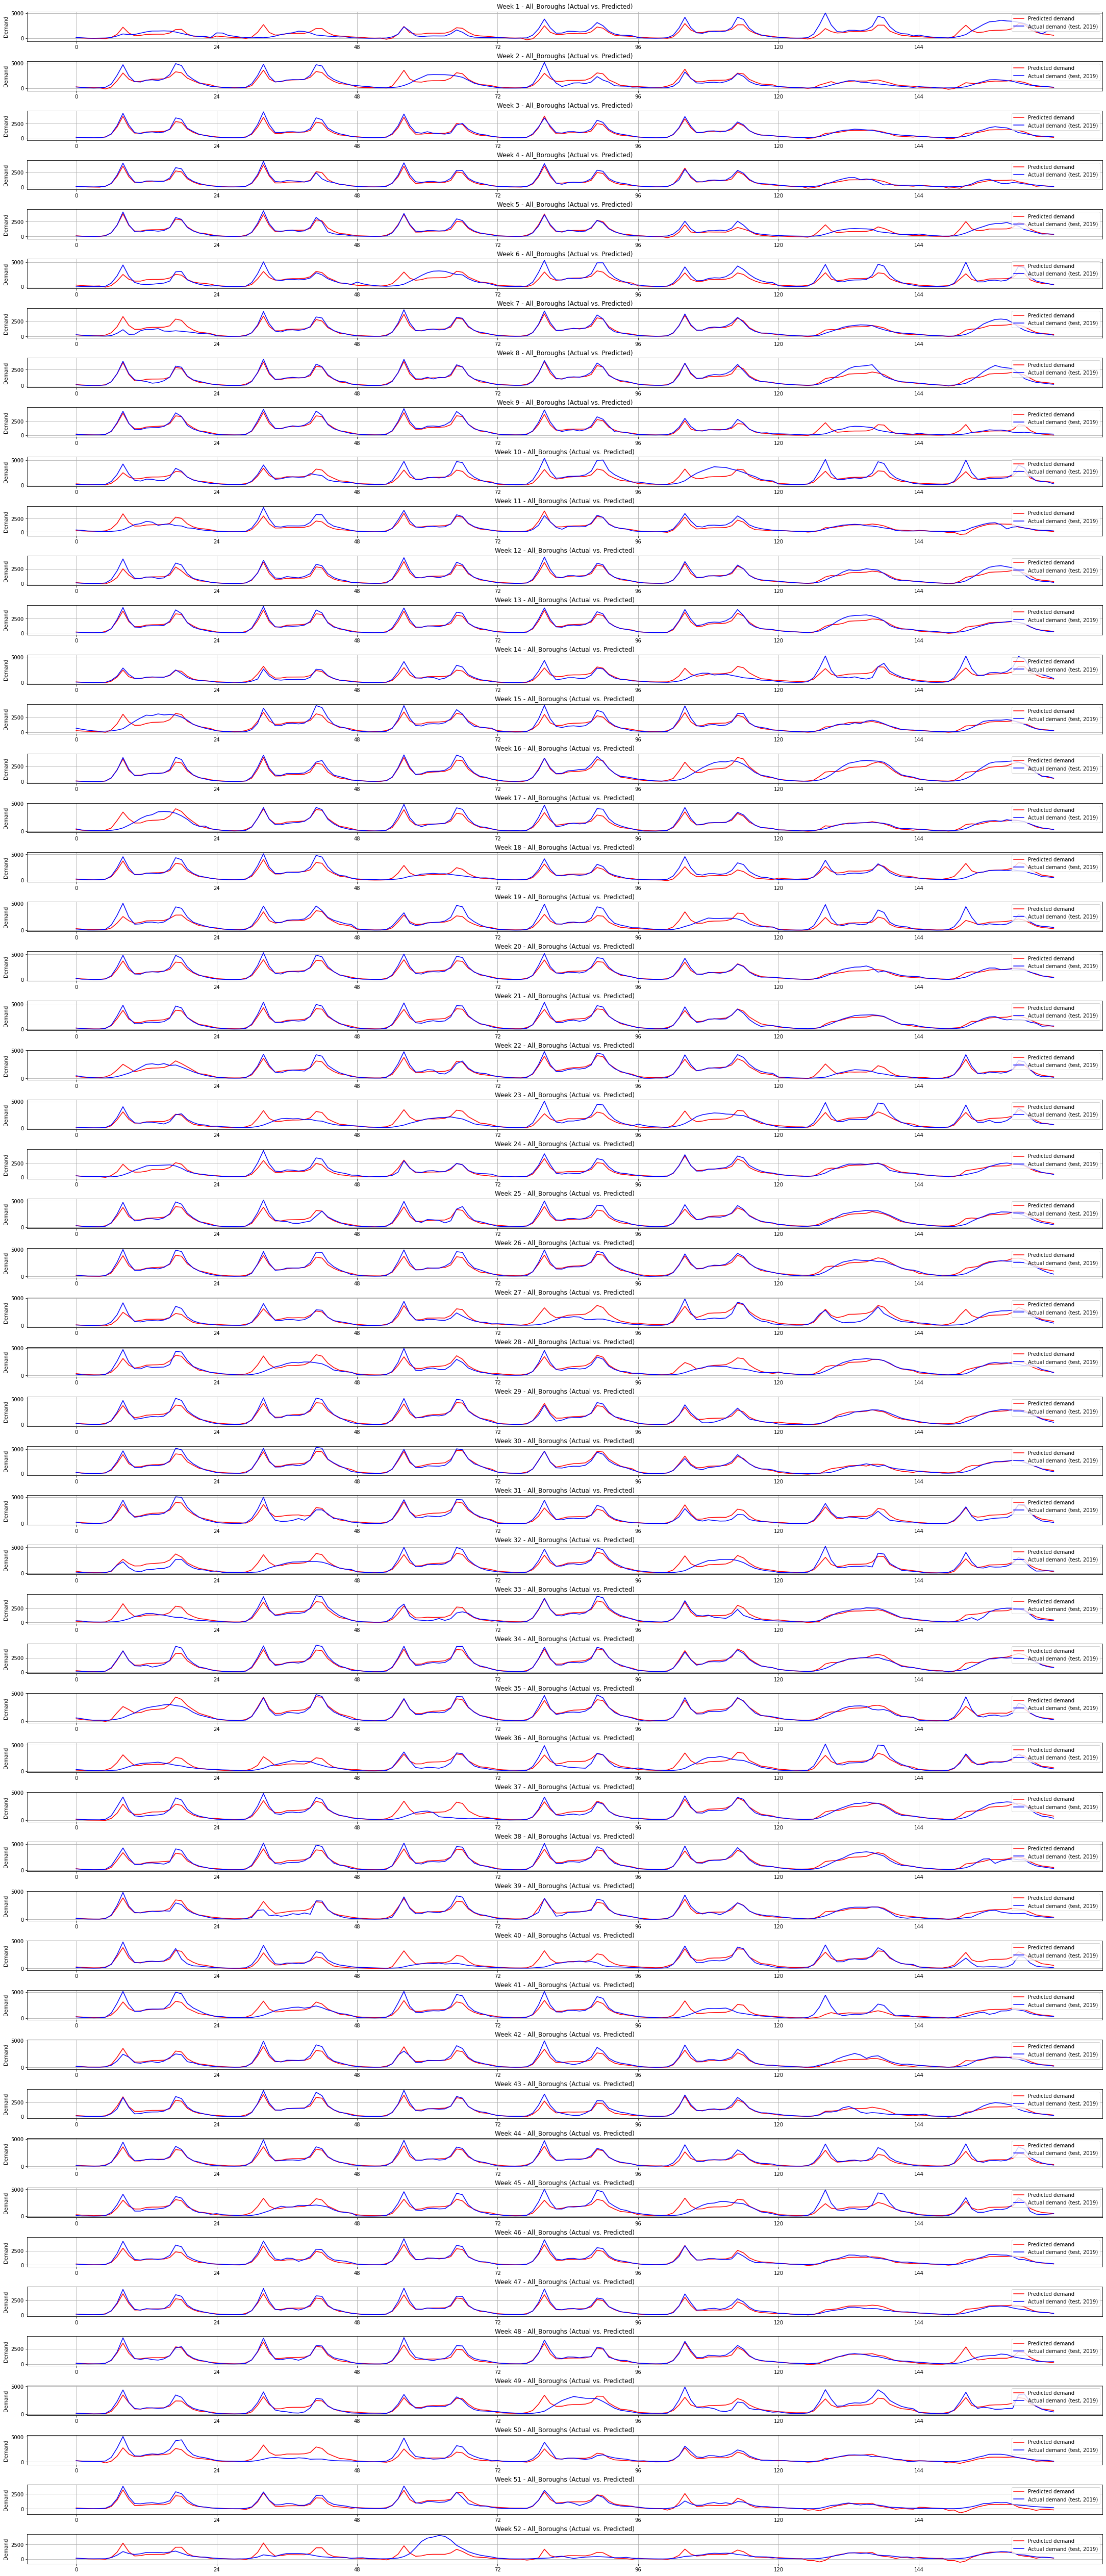

In [33]:
# visualisation: pred vs actual
model.evaluation_actual_vs_predicted(y_test, y_pred, journey_test, 'All_Boroughs')

In [34]:
# investigate elements with highest errors
df_errors = model.get_enornous_entrie(y_test, y_pred, x_test)
df_errors.head(10)

,Actual,Predicted,Error,day_of_week,hour,month,bank_holiday,start_borough_Westminster
100399,1588,269.466491,1318.533509,2,15,12.0,1.0,1
100387,1470,271.289922,1198.710078,2,14,12.0,1.0,1
100411,1464,343.078105,1120.921895,2,16,12.0,1.0,1
100375,1296,271.289922,1024.710078,2,13,12.0,1.0,1
100363,1162,270.597879,891.402121,2,12,12.0,1.0,1
71079,66,893.148724,827.148724,2,17,9.0,0.0,1
51682,278,1101.172459,823.172459,3,17,7.0,0.0,1
71091,62,819.861006,757.861006,2,18,9.0,0.0,1
100351,947,194.374468,752.625532,2,11,12.0,1.0,1
18598,1230,478.348355,751.651645,4,14,3.0,0.0,1


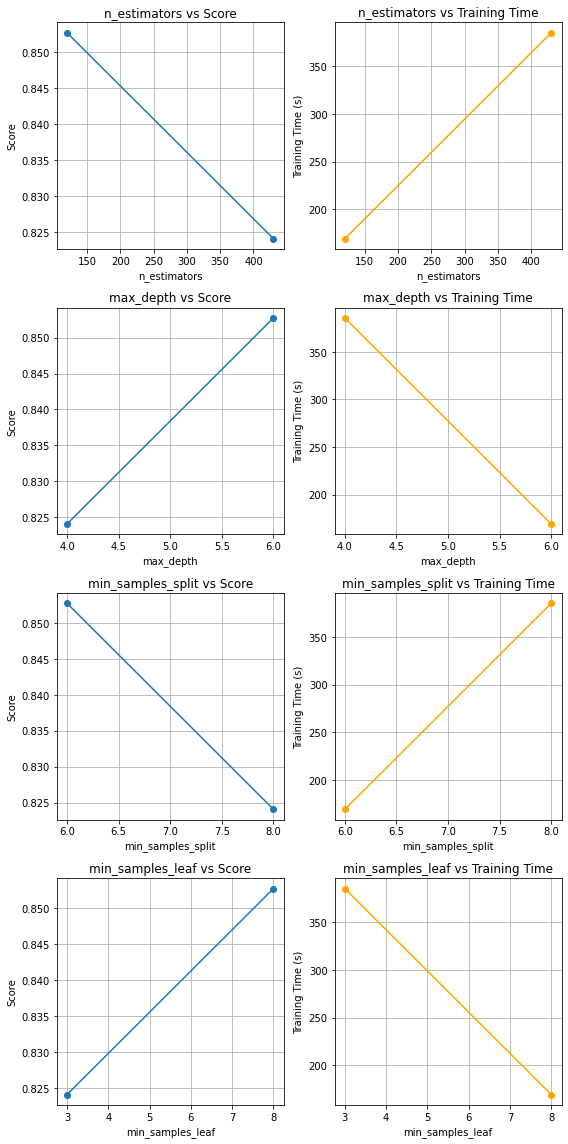

In [36]:
# visualize random search results
model.visualize_random_search_rf(random_search)